In [7]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Loading data

link = 'Full_Dataset.csv';

ft_data = pd.read_csv(link)

ft_data.tail()

,Round,Date,Time,Team,Team_Score,Opponent_Score,Opponent,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Team_Points,Opponent_Points,season,Location,Country,Competition
106871,SEMI FINALS,05/04/2023,19:00,WINNER QF 4,NaN,NaN,WINNER QF 3,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106872,SEMI FINALS,05/04/2023,19:00,WINNER QF 2,NaN,NaN,WINNER QF 1,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106873,SEMI FINALS,26/04/2023,19:00,WINNER QF 3,NaN,NaN,WINNER QF 4,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106874,SEMI FINALS,26/04/2023,19:00,WINNER QF 1,NaN,NaN,WINNER QF 2,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106875,FINAL,24/05/2023,19:00,WINNER SF 2,NaN,NaN,WINNER SF 1,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup


In [4]:
# Shape of the dataset
print("="*15)
print()
print(ft_data.shape)


# Datatypes for each column
print("="*15)
print()
print(ft_data.dtypes)


# Counting Missing values
print("="*15)
print()
print(ft_data.isnull().sum())



Column Names: 

Index(['Round', 'Date', 'Time', 'Team', 'Team_Score', 'Opponent_Score',
       'Opponent', 'Home_Score_AET', 'Away_Score_AET', 'Home_Penalties',
       'Away_Penalties', 'Team_Points', 'Opponent_Points', 'season',
       'Location', 'Country', 'Competition'],
      dtype='object')

(106876, 17)

Round               object
Date                object
Time                object
Team                object
Team_Score         float64
Opponent_Score     float64
Opponent            object
Home_Score_AET     float64
Away_Score_AET     float64
Home_Penalties     float64
Away_Penalties     float64
Team_Points        float64
Opponent_Points    float64
season               int64
Location            object
Country             object
Competition         object
dtype: object

Round                   0
Date                    0
Time                    0
Team                    0
Team_Score           2464
Opponent_Score       2464
Opponent                0
Home_Score_AET     103852
Away

In [9]:
ft_data['Team_Points'].isnull().tail(10)

# Cleaning Team Score
ft_clean = ft_data[ft_data['Team_Score'].notna()].copy()

ft_clean.head(6)

,Round,Date,Time,Team,Team_Score,Opponent_Score,Opponent,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Team_Points,Opponent_Points,season,Location,Country,Competition
0,ROUND 1,31/08/2002,22:30,RACING SANTANDER,0.0,1.0,VALLADOLID,NaN,NaN,NaN,NaN,0.0,3.0,2002,Home,spain,primera-division
1,ROUND 1,01/09/2002,21:00,RAYO VALLECANO,2.0,2.0,ALAVES,NaN,NaN,NaN,NaN,1.0,1.0,2002,Home,spain,primera-division
2,ROUND 1,01/09/2002,21:00,REAL SOCIEDAD,4.0,2.0,ATHLETIC BILBAO,NaN,NaN,NaN,NaN,3.0,0.0,2002,Home,spain,primera-division
3,ROUND 1,01/09/2002,22:00,MALLORCA,0.0,2.0,VALENCIA,NaN,NaN,NaN,NaN,0.0,3.0,2002,Home,spain,primera-division
4,ROUND 1,01/09/2002,22:30,VILLARREAL,2.0,2.0,OSASUNA,NaN,NaN,NaN,NaN,1.0,1.0,2002,Home,spain,primera-division
5,ROUND 1,01/09/2002,22:30,RECREATIVO HUELVA,2.0,3.0,MALAGA,NaN,NaN,NaN,NaN,0.0,3.0,2002,Home,spain,primera-division


In [17]:
# Summary Statistics


# Home teams
count_home_team = ft_clean[ft_clean['Location'] == 'Home']['Team'].value_counts()

# Country
count_country = ft_clean['Country'].value_counts()

# Competitions
count_comps = ft_clean['Competition'].value_counts()



# Total matches
print("Total matches:\n")
print(len(ft_clean))
print()
print("="*40)

# Count Home Teams
print(count_home_team)
print()
print("="*40)
print()

# Country Count

print(count_country)
print()
print("="*40)

# Competition Count
print(count_comps)
print()
print("="*40)
print()
print(ft_clean['Country'].unique())

Total matches:

104412

Team
BARCELONA          555
CHELSEA            546
REAL MADRID        539
MANCHESTER UTD     533
ARSENAL            530
                  ... 
QUIMPERLE            1
HASTINGS UNITED      1
LILLE SUD FC         1
BORGO FC             1
REGGIANA             1
Name: count, Length: 1717, dtype: int64


Country
england        21760
france         20302
spain          19280
italy          17746
germany        15092
europe-uefa    10232
Name: count, dtype: int64

Competition
fa-cup                   20024
premier-league           15552
primera-division         15516
ligue-1                  15340
serie-a                  15238
bundesliga               12510
uefa-europa-league        5180
uefa-champions-league     5052
Name: count, dtype: int64


['spain' 'england' 'germany' 'france' 'italy' 'europe-uefa']


In [102]:
# Most wins at home
most_home_wins = ft_clean[(ft_clean['Location'] == 'Home') & (ft_clean['Team_Points'] == 3.0)]['Team'].value_counts()
print("Most Home wins:\n")
print(most_home_wins)
print()
print("="*40)

# Most wins away
most_away_wins = ft_clean[(ft_clean['Location'] == 'Away') & (ft_clean['Team_Points'] == 3.0)]['Team'].value_counts()
print("Most Away wins:\n")
print(most_away_wins)
print()
print("="*40)

# Most wins by country
most_wins_country = ft_clean[ft_clean['Team_Points'] == 3.0]['Country'].value_counts()
print("Most wins by Country:\n")
print(most_wins_country)

Most Home wins:

Team
BARCELONA         422
REAL MADRID       398
BAYERN MUNICH     371
MANCHESTER UTD    370
CHELSEA           366
                 ... 
BRAINTREE           1
SOLIHULL MOORS      1
LA ROCHE S.Y.       1
AMIENS AC           1
L. R. VICENZA       1
Name: count, Length: 973, dtype: int64

Most Away wins:

Team
BAYERN MUNICH         323
BARCELONA             320
REAL MADRID           314
CHELSEA               285
MANCHESTER UTD        276
                     ... 
REAL LINENSE            1
MURET                   1
ATLETICO CIRBONERO      1
LUCON                   1
MONOPOLI                1
Name: count, Length: 840, dtype: int64

Most wins by Country:

Country
england        8378
france         7964
spain          7468
italy          6767
germany        5961
europe-uefa    3906
Name: count, dtype: int64


In [74]:
ft_clean.head(2)

,Round,Date,Time,Team,Team_Score,Opponent_Score,Opponent,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Team_Points,Opponent_Points,season,Location,Country,Competition
0,ROUND 1,31/08/2002,22:30,RACING SANTANDER,0.0,1.0,VALLADOLID,NaN,NaN,NaN,NaN,0.0,3.0,2002,Home,spain,primera-division
1,ROUND 1,01/09/2002,21:00,RAYO VALLECANO,2.0,2.0,ALAVES,NaN,NaN,NaN,NaN,1.0,1.0,2002,Home,spain,primera-division


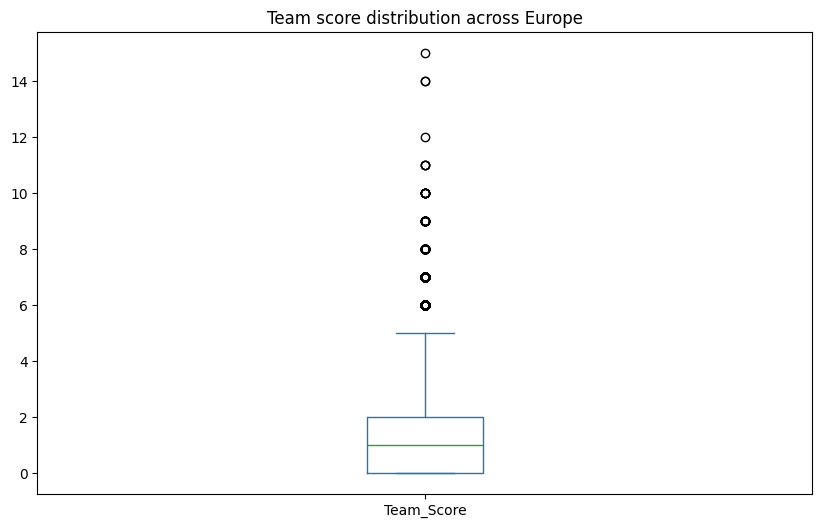

In [87]:
# Team score distribution
ft_clean['Team_Score'].plot(kind='box', figsize=(10, 6))
plt.title('Team score distribution across Europe')
plt.show()

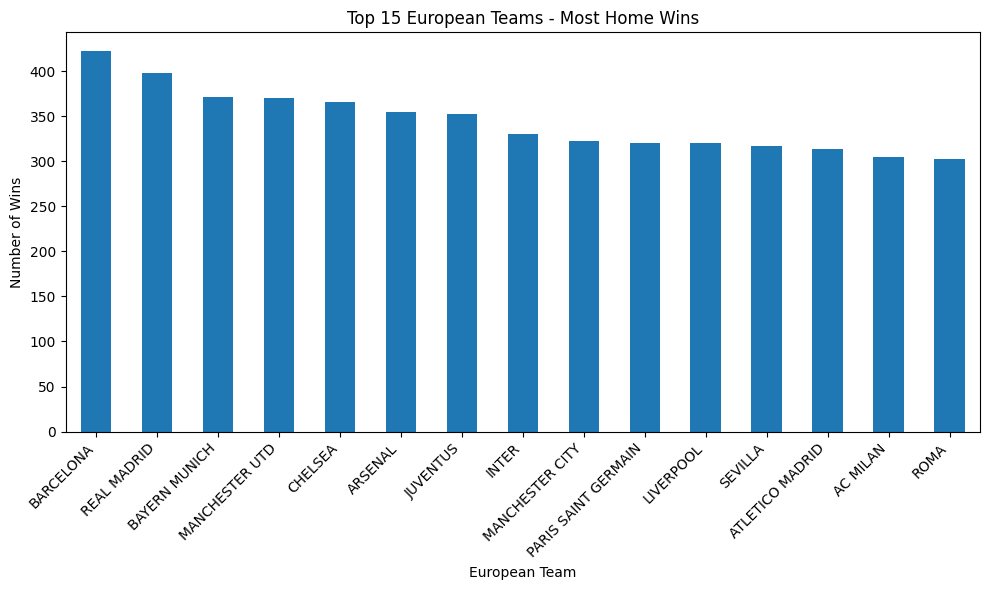

In [103]:
# Top 15 European Teams - Most Home wins
most_home_wins.head(15).plot(kind='bar', figsize=(10, 6))
plt.title('Top 15 European Teams - Most Home Wins')
plt.xlabel('European Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

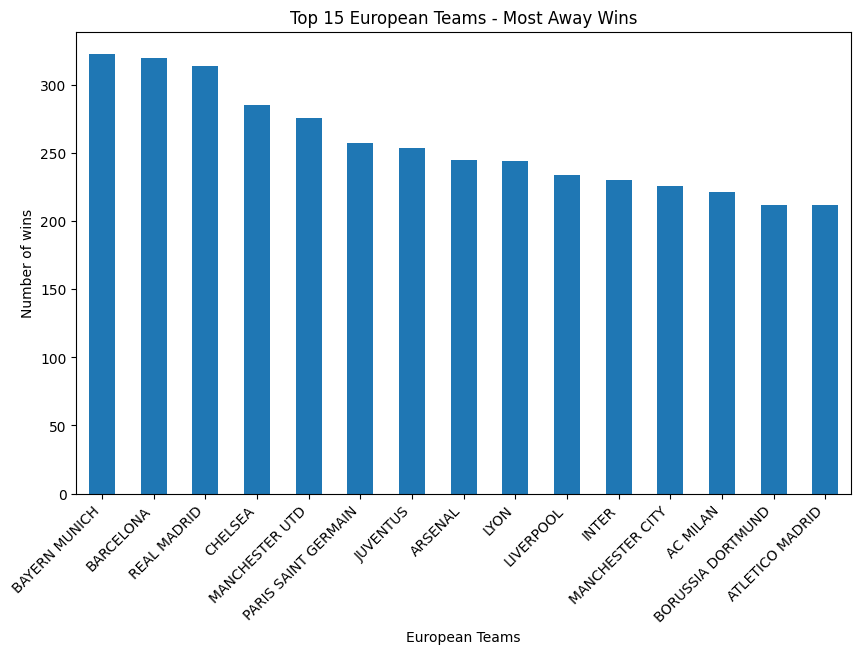

In [89]:
# Top 15 European Teams - Most Away Wins
most_away_wins.head(15).plot(kind='bar', figsize=(10, 6))
plt.title('Top 15 European Teams - Most Away Wins')
plt.ylabel('Number of wins')
plt.xlabel('European Teams')
plt.xticks(rotation=45, ha='right')
plt.show()

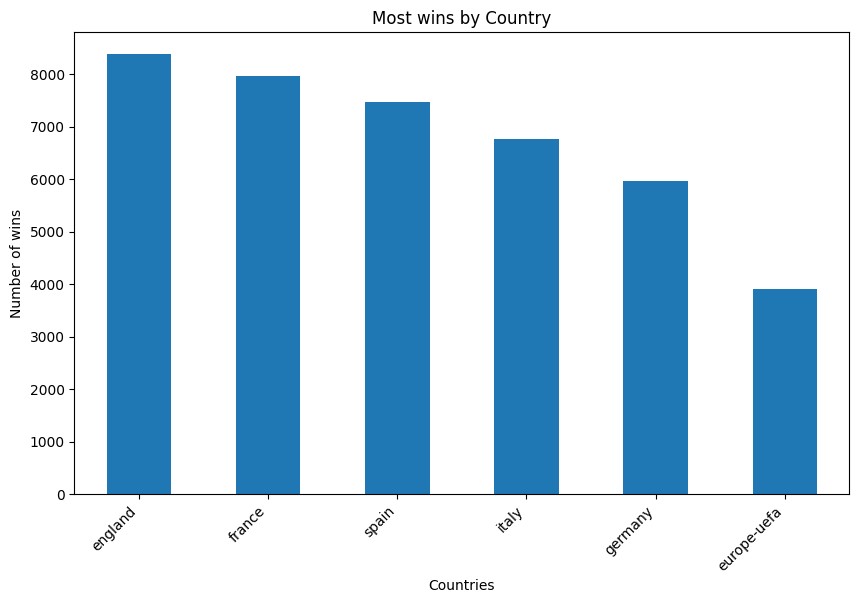

In [104]:
# Most wins by Country
most_wins_country.plot(kind='bar', figsize=(10, 6))
plt.title('Most wins by Country')
plt.ylabel('Number of wins')
plt.xlabel('Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [91]:
ft_clean.head(2)

,Round,Date,Time,Team,Team_Score,Opponent_Score,Opponent,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Team_Points,Opponent_Points,season,Location,Country,Competition
0,ROUND 1,31/08/2002,22:30,RACING SANTANDER,0.0,1.0,VALLADOLID,NaN,NaN,NaN,NaN,0.0,3.0,2002,Home,spain,primera-division
1,ROUND 1,01/09/2002,21:00,RAYO VALLECANO,2.0,2.0,ALAVES,NaN,NaN,NaN,NaN,1.0,1.0,2002,Home,spain,primera-division


In [105]:
len(ft_clean['Team'].unique())

1936

In [106]:
# Win Percentages

home_wins = ft_clean[(ft_clean['Location'] == 'Home') & (ft_clean['Team_Points'] == 3.0)].groupby('Team').size()
away_wins = ft_clean[(ft_clean['Location'] == 'Away') & (ft_clean['Team_Points'] == 3.0)].groupby('Team').size()

home_advantage = (home_wins - away_wins).sort_values(ascending=False)
home_advantage

Team
SEVILLA              120.0
TOTTENHAM            117.0
ARSENAL              110.0
ROMA                 102.0
ATLETICO MADRID      102.0
                     ...  
WEYMOUTH               NaN
WHITEHAWK              NaN
WORMATIA WORMS         NaN
WUPPERTALER SV         NaN
YECLANO DEPORTIVO      NaN
Length: 1116, dtype: float64

## Key Findings

- Barcelona has the most home wins in Europe between 2002 and 2023, with 422 wins.
- Bayern has the most away wins in Europe, with 323 wins.
- England recorded the most wins of any country (8,378 total wins)
- Barcelona is in the top 2 in wins as the home and away team.
- There are a total of 1936 teams recorded across Europe.
- Among all teams in Europe, Sevilla has the biggest home advantage
- Most matches ended in low scoring, with some high-scoring exceptions (outliers)